In [1]:
!pip install pyspark pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840625 sha256=a2c8657a69b8c8989c37495a82e548ca58532c970fc5a3e6fbe03b46a2982c0e
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark


In [8]:
import pandas as pd

# Data penjualan
data = {
    'ProductID': ['P001', 'P002', 'P003', 'P004', 'P005', 'P006'],
    'ProductName': ['Product A', 'Product B', 'Product C', 'Product D', 'Product E', 'Product F'],
    'Category': ['Electronics', 'Electronics', 'Clothing', 'Clothing', 'Kitchen', 'Kitchen'],
    'Quantity': [10, 30, 20, 15, 25, 5],
    'Price': [200, 150, 100, 120, 90, 300],
    'Date': ['2022-01-10', '2022-02-10', '2022-03-10', '2022-02-12', '2022-04-13', '2022-01-14']
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Menampilkan tabel pertama dengan kolom Date masih utuh
print("Tabel dengan kolom 'Date' masih utuh:")
print(df)

# Mengubah kolom 'Date' menjadi tipe datetime
df['Date'] = pd.to_datetime(df['Date'])

# Memisahkan tanggal menjadi kolom Hari, Bulan, dan Tahun
df['Hari'] = df['Date'].dt.day
df['Bulan'] = df['Date'].dt.month
df['Tahun'] = df['Date'].dt.year

# Menghapus kolom 'Date'
df_tanpa_date = df.drop(columns=['Date'])

# Menampilkan tabel kedua dengan kolom 'Date' sudah dibagi menjadi Hari, Bulan, Tahun
print("\nTabel dengan kolom 'Date' dibagi menjadi 'Hari', 'Bulan', dan 'Tahun' serta kolom 'Date' dihapus:")
print(df_tanpa_date)


Tabel dengan kolom 'Date' masih utuh:
  ProductID ProductName     Category  Quantity  Price        Date
0      P001   Product A  Electronics        10    200  2022-01-10
1      P002   Product B  Electronics        30    150  2022-02-10
2      P003   Product C     Clothing        20    100  2022-03-10
3      P004   Product D     Clothing        15    120  2022-02-12
4      P005   Product E      Kitchen        25     90  2022-04-13
5      P006   Product F      Kitchen         5    300  2022-01-14

Tabel dengan kolom 'Date' dibagi menjadi 'Hari', 'Bulan', dan 'Tahun' serta kolom 'Date' dihapus:
  ProductID ProductName     Category  Quantity  Price  Hari  Bulan  Tahun
0      P001   Product A  Electronics        10    200    10      1   2022
1      P002   Product B  Electronics        30    150    10      2   2022
2      P003   Product C     Clothing        20    100    10      3   2022
3      P004   Product D     Clothing        15    120    12      2   2022
4      P005   Product E      Ki

In [7]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create a 'Month' column
df['Month'] = df['Date'].dt.to_period('M')

# Calculate total revenue (Quantity * Price)
df['Revenue'] = df['Quantity'] * df['Price']

# Group by Category and Month, and sum the revenue
total_revenue = df.groupby(['Category', 'Month'])['Revenue'].sum().reset_index()
print(total_revenue)


      Category    Month  Revenue
0     Clothing  2022-02     1800
1     Clothing  2022-03     2000
2  Electronics  2022-01     2000
3  Electronics  2022-02     4500
4      Kitchen  2022-01     1500
5      Kitchen  2022-04     2250


In [3]:
# Find the product with the lowest price in each category
lowest_priced_products = df.loc[df.groupby('Category')['Price'].idxmin()]
print(lowest_priced_products[['Category', 'ProductName', 'Price']])


      Category ProductName  Price
2     Clothing   Product C    100
1  Electronics   Product B    150
4      Kitchen   Product E     90


In [4]:
# Group by Category and Month to find total quantity sold
sales_trend = df.groupby(['Category', 'Month'])['Quantity'].sum().reset_index()
print(sales_trend)


      Category    Month  Quantity
0     Clothing  2022-02        15
1     Clothing  2022-03        20
2  Electronics  2022-01        10
3  Electronics  2022-02        30
4      Kitchen  2022-01         5
5      Kitchen  2022-04        25


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


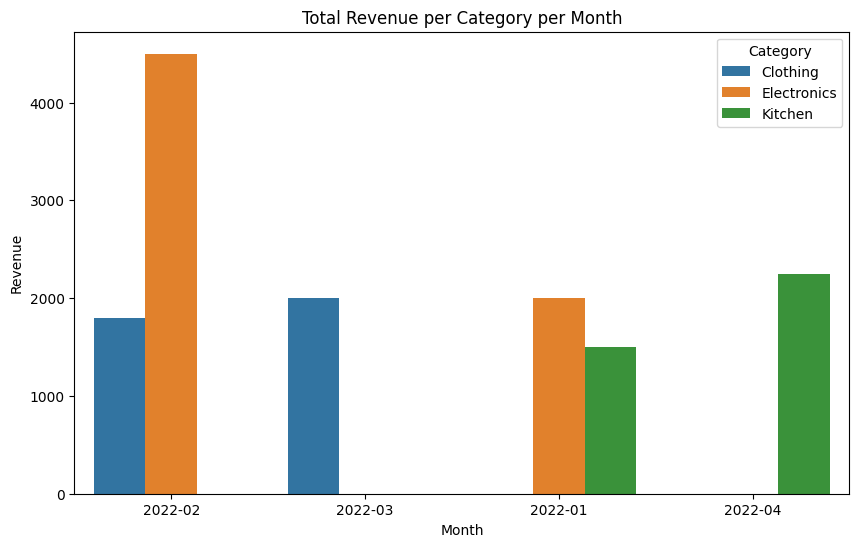

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot total revenue per category
plt.figure(figsize=(10, 6))
sns.barplot(data=total_revenue, x='Month', y='Revenue', hue='Category')
plt.title('Total Revenue per Category per Month')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()
